### EDA Using Pandas and Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

### Read CSV 

In [3]:
df=pd.read_csv("car_sales_data_with_nulls.csv")
df

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300.0,3074.0
1,Porsche,718 Cayman,4.0,Petrol,2016,57850.0,49704.0
2,Ford,Mondeo,1.6,Diesel,2014,NaN,24072.0
3,Toyota,RAV4,1.8,NaN,1988,210814.0,1705.0
4,VW,Polo,NaN,Petrol,2006,127869.0,NaN
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664.0,113006.0
49996,Toyota,Prius,1.8,Hybrid,2003,105120.0,NaN
49997,Ford,Mondeo,1.6,NaN,2022,NaN,49852.0
49998,Ford,Focus,1.0,NaN,2016,26468.0,23630.0


### Basic Checks

In [4]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300.0,3074.0
1,Porsche,718 Cayman,4.0,Petrol,2016,57850.0,49704.0
2,Ford,Mondeo,1.6,Diesel,2014,NaN,24072.0
3,Toyota,RAV4,1.8,NaN,1988,210814.0,1705.0
4,VW,Polo,NaN,Petrol,2006,127869.0,NaN


In [5]:
df.tail()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
49995,BMW,M5,5.0,Petrol,2018,28664.0,113006.0
49996,Toyota,Prius,1.8,Hybrid,2003,105120.0,NaN
49997,Ford,Mondeo,1.6,NaN,2022,NaN,49852.0
49998,Ford,Focus,1.0,NaN,2016,26468.0,23630.0
49999,VW,Golf,1.4,NaN,2012,109300.0,10400.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          40000 non-null  float64
 3   Fuel type            40000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              40000 non-null  float64
 6   Price                40000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.7+ MB


In [7]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,40000.000000,50000.000000,40000.000000,40000.000000
mean,1.773225,2004.209440,112452.077825,13852.484400
std,0.738258,9.645965,71553.424659,16491.565985
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54447.500000,3066.750000
50%,1.600000,2004.000000,100995.000000,7958.500000
75%,2.000000,2012.000000,158609.000000,19046.250000
max,5.000000,2022.000000,453537.000000,168081.000000


In [8]:
df.shape

(50000, 7)

In [9]:
df.size

350000

In [10]:
df.nunique() # unique values from each columns 

Manufacturer               5
Model                     15
Engine size               14
Fuel type                  3
Year of manufacture       39
Mileage                36758
Price                  22064
dtype: int64

In [11]:
df.value_counts()

Manufacturer  Model   Engine size  Fuel type  Year of manufacture  Mileage   Price  
VW            Polo    1.0          Petrol     2000                 11500.0   5950.0     2
              Golf    1.2          Diesel     2011                 6000.0    17401.0    2
BMW           M5      4.0          Petrol     1984                 89953.0   7064.0     1
Toyota        Yaris   1.2          Petrol     2009                 33878.0   11830.0    1
                                                                   32931.0   11895.0    1
                                                                                       ..
Ford          Mondeo  1.6          Diesel     2003                 66984.0   9706.0     1
                                                                   63696.0   9918.0     1
                                              2002                 163599.0  4372.0     1
                                                                   160119.0  4501.0     1
VW            P

### Changing Datatypes

In [12]:
df["Year of manufacture"]=pd.to_datetime(df["Year of manufacture"],errors="coerce")


In [13]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,1970-01-01 00:00:00.000002002,127300.0,3074.0
1,Porsche,718 Cayman,4.0,Petrol,1970-01-01 00:00:00.000002016,57850.0,49704.0
2,Ford,Mondeo,1.6,Diesel,1970-01-01 00:00:00.000002014,NaN,24072.0
3,Toyota,RAV4,1.8,NaN,1970-01-01 00:00:00.000001988,210814.0,1705.0
4,VW,Polo,NaN,Petrol,1970-01-01 00:00:00.000002006,127869.0,NaN


In [14]:
df.dtypes

Manufacturer                   object
Model                          object
Engine size                   float64
Fuel type                      object
Year of manufacture    datetime64[ns]
Mileage                       float64
Price                         float64
dtype: object

### Finding null Values

In [15]:
df.isnull().sum()

Manufacturer               0
Model                      0
Engine size            10000
Fuel type              10000
Year of manufacture        0
Mileage                10000
Price                  10000
dtype: int64

### To check null values in each columns |

In [16]:
df["Price"].isnull().sum()

10000

In [18]:
df["Engine size"].isnull().sum()

10000

In [19]:
df["Price"].isnull().sum()

10000

### To remove / replace Null values 

In [20]:
#df.fillna(0, inplace=True)  # Replaces all NaNs with 0
#df.fillna({'column1': 0, 'column2': 'unknown'}, inplace=True) for specific column

In [21]:
df["Mileage"].fillna(df["Mileage"].mean(),inplace=True)
df["Engine size"].fillna(df["Engine size"].median(),inplace=True)
df["Fuel type"].fillna(df["Fuel type"].mode()[0],inplace=True)
df["Price"].fillna(df["Price"].mean(),inplace=True)

In [22]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

### Find Dupliactes

In [23]:
df.duplicated().sum() #count

551

In [24]:
df[df.duplicated()]

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
1828,VW,Polo,1.4,Petrol,1970-01-01 00:00:00.000002005,112452.077825,13852.4844
1999,VW,Polo,1.0,Petrol,1970-01-01 00:00:00.000002000,112452.077825,13852.4844
2236,VW,Polo,1.4,Petrol,1970-01-01 00:00:00.000001993,112452.077825,13852.4844
2393,Toyota,Yaris,1.2,Petrol,1970-01-01 00:00:00.000001997,112452.077825,13852.4844
2548,Porsche,718 Cayman,2.0,Petrol,1970-01-01 00:00:00.000002009,112452.077825,13852.4844
...,...,...,...,...,...,...,...
49844,Ford,Mondeo,1.6,Diesel,1970-01-01 00:00:00.000002004,112452.077825,13852.4844
49866,Toyota,Prius,1.4,Hybrid,1970-01-01 00:00:00.000002000,112452.077825,13852.4844
49875,VW,Passat,1.6,Diesel,1970-01-01 00:00:00.000002018,112452.077825,13852.4844
49951,VW,Passat,1.4,Diesel,1970-01-01 00:00:00.000002015,112452.077825,13852.4844


In [25]:
df.drop_duplicates()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,1970-01-01 00:00:00.000002002,127300.000000,3074.0000
1,Porsche,718 Cayman,4.0,Petrol,1970-01-01 00:00:00.000002016,57850.000000,49704.0000
2,Ford,Mondeo,1.6,Diesel,1970-01-01 00:00:00.000002014,112452.077825,24072.0000
3,Toyota,RAV4,1.8,Petrol,1970-01-01 00:00:00.000001988,210814.000000,1705.0000
4,VW,Polo,1.6,Petrol,1970-01-01 00:00:00.000002006,127869.000000,13852.4844
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,1970-01-01 00:00:00.000002018,28664.000000,113006.0000
49996,Toyota,Prius,1.8,Hybrid,1970-01-01 00:00:00.000002003,105120.000000,13852.4844
49997,Ford,Mondeo,1.6,Petrol,1970-01-01 00:00:00.000002022,112452.077825,49852.0000
49998,Ford,Focus,1.0,Petrol,1970-01-01 00:00:00.000002016,26468.000000,23630.0000


### Filter Based Criteria / conditional based 

In [84]:
df[df["Engine_size"]>2]

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
1,Porsche,718 Cayman,4.0,PT,1970-01-01 00:00:00.000002016,57850.000000,49704.0000
13,Toyota,RAV4,2.2,PT,1970-01-01 00:00:00.000002007,79393.000000,16026.0000
16,Toyota,RAV4,2.4,HYB,1970-01-01 00:00:00.000002003,117425.000000,11667.0000
24,Porsche,911,2.6,PT,1970-01-01 00:00:00.000002009,66273.000000,41963.0000
26,Porsche,911,3.5,PT,1970-01-01 00:00:00.000002005,112452.077825,19747.0000
...,...,...,...,...,...,...,...
49948,BMW,X3,2.4,DSL,1970-01-01 00:00:00.000002012,71834.000000,24526.0000
49956,BMW,Z4,2.4,PT,1970-01-01 00:00:00.000002015,112452.077825,29466.0000
49966,BMW,X3,3.0,DSL,1970-01-01 00:00:00.000002006,106873.000000,14336.0000
49969,BMW,Z4,2.2,PT,1970-01-01 00:00:00.000002013,112452.077825,13852.4844


In [27]:
df["Manufacturer"].str.contains("For")

0         True
1        False
2         True
3        False
4        False
         ...  
49995    False
49996    False
49997     True
49998     True
49999    False
Name: Manufacturer, Length: 50000, dtype: bool

### Rename Columns/ ROWS

In [28]:
df.rename(columns={"Engine size": "Engine_size","Year of manufacture":"Manufacturer_Year","Fuel type": "Fuel_type",},inplace=True)

In [29]:
df

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,1970-01-01 00:00:00.000002002,127300.000000,3074.0000
1,Porsche,718 Cayman,4.0,Petrol,1970-01-01 00:00:00.000002016,57850.000000,49704.0000
2,Ford,Mondeo,1.6,Diesel,1970-01-01 00:00:00.000002014,112452.077825,24072.0000
3,Toyota,RAV4,1.8,Petrol,1970-01-01 00:00:00.000001988,210814.000000,1705.0000
4,VW,Polo,1.6,Petrol,1970-01-01 00:00:00.000002006,127869.000000,13852.4844
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,1970-01-01 00:00:00.000002018,28664.000000,113006.0000
49996,Toyota,Prius,1.8,Hybrid,1970-01-01 00:00:00.000002003,105120.000000,13852.4844
49997,Ford,Mondeo,1.6,Petrol,1970-01-01 00:00:00.000002022,112452.077825,49852.0000
49998,Ford,Focus,1.0,Petrol,1970-01-01 00:00:00.000002016,26468.000000,23630.0000


In [30]:
df.sort_values(by="Price")

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
18063,VW,Polo,1.0,Petrol,1970-01-01 00:00:00.000001987,422895.000000,76.0
41960,Ford,Fiesta,1.6,Petrol,1970-01-01 00:00:00.000001984,395085.000000,94.0
21048,Ford,Fiesta,1.6,Petrol,1970-01-01 00:00:00.000001985,375388.000000,103.0
28650,VW,Polo,1.0,Petrol,1970-01-01 00:00:00.000001986,360154.000000,131.0
24824,Ford,Fiesta,1.4,Petrol,1970-01-01 00:00:00.000001985,368573.000000,131.0
...,...,...,...,...,...,...,...
38166,BMW,M5,5.0,Petrol,1970-01-01 00:00:00.000002022,9797.000000,163608.0
49362,Porsche,911,3.5,Petrol,1970-01-01 00:00:00.000002022,6963.000000,164343.0
38438,Porsche,911,3.5,Petrol,1970-01-01 00:00:00.000002022,112452.077825,167774.0
14860,BMW,M5,5.0,Petrol,1970-01-01 00:00:00.000002022,4683.000000,168001.0


In [31]:
df["Price"].nlargest(2)

22786    168081.0
14860    168001.0
Name: Price, dtype: float64

In [32]:
df["Mileage"].nsmallest(2)

30697    630.0
20045    664.0
Name: Mileage, dtype: float64

In [33]:
df["Fuel_type"].replace({"Petrol":"PT"},inplace=True)

In [34]:
df["Fuel_type"].replace({"Diesel":"DSL"},inplace=True)

In [35]:
df["Fuel_type"].replace({"Hybrid":"HYB"},inplace=True)

In [36]:
df

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
0,Ford,Fiesta,1.0,PT,1970-01-01 00:00:00.000002002,127300.000000,3074.0000
1,Porsche,718 Cayman,4.0,PT,1970-01-01 00:00:00.000002016,57850.000000,49704.0000
2,Ford,Mondeo,1.6,DSL,1970-01-01 00:00:00.000002014,112452.077825,24072.0000
3,Toyota,RAV4,1.8,PT,1970-01-01 00:00:00.000001988,210814.000000,1705.0000
4,VW,Polo,1.6,PT,1970-01-01 00:00:00.000002006,127869.000000,13852.4844
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,PT,1970-01-01 00:00:00.000002018,28664.000000,113006.0000
49996,Toyota,Prius,1.8,HYB,1970-01-01 00:00:00.000002003,105120.000000,13852.4844
49997,Ford,Mondeo,1.6,PT,1970-01-01 00:00:00.000002022,112452.077825,49852.0000
49998,Ford,Focus,1.0,PT,1970-01-01 00:00:00.000002016,26468.000000,23630.0000


In [37]:
df["Mileage"].sort_values()

30697       630.0
20045       664.0
36576       770.0
18313      1000.0
23927      1000.0
           ...   
18546    423053.0
42430    423108.0
26780    434923.0
41039    446897.0
41001    453537.0
Name: Mileage, Length: 50000, dtype: float64

### Accessing data  

In [38]:
df.loc[0]

Manufacturer                                  Ford
Model                                       Fiesta
Engine_size                                    1.0
Fuel_type                                       PT
Manufacturer_Year    1970-01-01 00:00:00.000002002
Mileage                                   127300.0
Price                                       3074.0
Name: 0, dtype: object

In [39]:
df.iloc[[0,1]]

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
0,Ford,Fiesta,1.0,PT,1970-01-01 00:00:00.000002002,127300.0,3074.0
1,Porsche,718 Cayman,4.0,PT,1970-01-01 00:00:00.000002016,57850.0,49704.0


In [40]:
df.at[100,"Manufacturer"]

'Ford'

###  Grouping and Aggregation 

In [41]:
df.head(5)

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
0,Ford,Fiesta,1.0,PT,1970-01-01 00:00:00.000002002,127300.000000,3074.0000
1,Porsche,718 Cayman,4.0,PT,1970-01-01 00:00:00.000002016,57850.000000,49704.0000
2,Ford,Mondeo,1.6,DSL,1970-01-01 00:00:00.000002014,112452.077825,24072.0000
3,Toyota,RAV4,1.8,PT,1970-01-01 00:00:00.000001988,210814.000000,1705.0000
4,VW,Polo,1.6,PT,1970-01-01 00:00:00.000002006,127869.000000,13852.4844


In [43]:
df.groupby(by=["Model","Fuel_type"])

In [44]:
df["Mileage"].value_counts()

Mileage
112452.077825    10000
6000.000000          8
11500.000000         8
13500.000000         6
12500.000000         6
                 ...  
130743.000000        1
156792.000000        1
137637.000000        1
316183.000000        1
109300.000000        1
Name: count, Length: 36759, dtype: int64

In [45]:
df.groupby("Manufacturer")["Price"].mean()

Manufacturer
BMW        22524.574039
Ford       11342.243020
Porsche    26054.091246
Toyota     14210.825269
VW         11046.957156
Name: Price, dtype: float64

In [46]:
df.groupby("Manufacturer")["Price"].sum()

Manufacturer
BMW        1.118345e+08
Ford       1.696686e+08
Porsche    6.797512e+07
Toyota     1.784027e+08
VW         1.647433e+08
Name: Price, dtype: float64

In [47]:
df.count()

Manufacturer         50000
Model                50000
Engine_size          50000
Fuel_type            50000
Manufacturer_Year    50000
Mileage              50000
Price                50000
dtype: int64

In [49]:
df["Engine_size"].min()

1.0

In [50]:
df["Engine_size"].max()

5.0

In [51]:
df.dtypes

Manufacturer                 object
Model                        object
Engine_size                 float64
Fuel_type                    object
Manufacturer_Year    datetime64[ns]
Mileage                     float64
Price                       float64
dtype: object

In [52]:
df.groupby("Model")["Manufacturer_Year"].median()

Model
718 Cayman   1970-01-01 00:00:00.000002005
911          1970-01-01 00:00:00.000002004
Cayenne      1970-01-01 00:00:00.000002005
Fiesta       1970-01-01 00:00:00.000002004
Focus        1970-01-01 00:00:00.000002004
Golf         1970-01-01 00:00:00.000002004
M5           1970-01-01 00:00:00.000002004
Mondeo       1970-01-01 00:00:00.000002004
Passat       1970-01-01 00:00:00.000002004
Polo         1970-01-01 00:00:00.000002004
Prius        1970-01-01 00:00:00.000002004
RAV4         1970-01-01 00:00:00.000002004
X3           1970-01-01 00:00:00.000002004
Yaris        1970-01-01 00:00:00.000002005
Z4           1970-01-01 00:00:00.000002004
Name: Manufacturer_Year, dtype: datetime64[ns]

In [53]:
df.head(3)

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
0,Ford,Fiesta,1.0,PT,1970-01-01 00:00:00.000002002,127300.000000,3074.0
1,Porsche,718 Cayman,4.0,PT,1970-01-01 00:00:00.000002016,57850.000000,49704.0
2,Ford,Mondeo,1.6,DSL,1970-01-01 00:00:00.000002014,112452.077825,24072.0


### Muitiple Aggregation on Groupby

In [54]:
df.groupby("Manufacturer")["Price"].aggregate(["sum","min","max","mean","median","count"])

,sum,min,max,mean,median,count
Manufacturer,,,,,,
BMW,1.118345e+08,167.0,168081.0,22524.574039,13852.4844,4965
Ford,1.696686e+08,94.0,62748.0,11342.243020,10359.0000,14959
Porsche,6.797512e+07,266.0,167774.0,26054.091246,13852.4844,2609
Toyota,1.784027e+08,176.0,86353.0,14210.825269,13601.0000,12554
VW,1.647433e+08,76.0,58588.0,11046.957156,9815.0000,14913


In [55]:
df["Price"].cumsum()

0        3.074000e+03
1        5.277800e+04
2        7.685000e+04
3        7.855500e+04
4        9.240748e+04
             ...     
49995    6.925265e+08
49996    6.925403e+08
49997    6.925902e+08
49998    6.926138e+08
49999    6.926242e+08
Name: Price, Length: 50000, dtype: float64

### Cross_Tab

In [56]:
df.head(2)

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
0,Ford,Fiesta,1.0,PT,1970-01-01 00:00:00.000002002,127300.0,3074.0
1,Porsche,718 Cayman,4.0,PT,1970-01-01 00:00:00.000002016,57850.0,49704.0


In [57]:
pd.crosstab(df["Manufacturer"],df["Model"])

Model,718 Cayman,911,Cayenne,Fiesta,Focus,Golf,M5,Mondeo,Passat,Polo,Prius,RAV4,X3,Yaris,Z4
Manufacturer,,,,,,,,,,,,,,,
BMW,0,0,0,0,0,0,1645,0,0,0,0,0,1632,0,1688
Ford,0,0,0,4925,4976,0,0,5058,0,0,0,0,0,0,0
Porsche,867,872,870,0,0,0,0,0,0,0,0,0,0,0,0
Toyota,0,0,0,0,0,0,0,0,0,0,4171,4292,0,4091,0
VW,0,0,0,0,0,5050,0,0,4871,4992,0,0,0,0,0


In [58]:
pd.crosstab(df["Price"],df["Model"])

Model,718 Cayman,911,Cayenne,Fiesta,Focus,Golf,M5,Mondeo,Passat,Polo,Prius,RAV4,X3,Yaris,Z4
Price,,,,,,,,,,,,,,,
76.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
94.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
103.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
131.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
133.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163608.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
164343.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
167774.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### CrossTab with Aggregation

In [59]:
pd.crosstab(df["Manufacturer"],df["Model"],values=df["Price"],aggfunc='mean',margins=True)

Model,718 Cayman,911,Cayenne,Fiesta,Focus,Golf,M5,Mondeo,Passat,Polo,Prius,RAV4,X3,Yaris,Z4,All
Manufacturer,,,,,,,,,,,,,,,,
BMW,NaN,NaN,NaN,NaN,NaN,NaN,35421.249634,NaN,NaN,NaN,NaN,NaN,16803.252657,NaN,15487.942013,22524.574039
Ford,NaN,NaN,NaN,8563.224348,12145.437829,NaN,NaN,13258.013996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11342.243020
Porsche,20076.300413,32083.400485,25968.099286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26054.091246
Toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13955.649235,18161.332535,NaN,10326.386757,NaN,14210.825269
VW,NaN,NaN,NaN,NaN,NaN,11011.049671,NaN,NaN,13153.203027,9028.0888,NaN,NaN,NaN,NaN,NaN,11046.957156
All,20076.300413,32083.400485,25968.099286,8563.224348,12145.437829,11011.049671,35421.249634,13258.013996,13153.203027,9028.0888,13955.649235,18161.332535,16803.252657,10326.386757,15487.942013,13852.484400


In [60]:
df.columns

Index(['Manufacturer', 'Model', 'Engine_size', 'Fuel_type',
       'Manufacturer_Year', 'Mileage', 'Price'],
      dtype='object')

In [61]:
pd.crosstab(df["Fuel_type"],df["Manufacturer"],values=df["Mileage"],aggfunc="median",margins=True)

Manufacturer,BMW,Ford,Porsche,Toyota,VW,All
Fuel_type,,,,,,
DSL,112452.077825,112452.077825,112452.077825,NaN,112452.077825,112452.077825
HYB,NaN,112452.077825,NaN,112452.077825,112452.077825,112452.077825
PT,112452.077825,112452.077825,112452.077825,112452.077825,112452.077825,112452.077825
All,112452.077825,112452.077825,112452.077825,112452.077825,112452.077825,112452.077825


### Visualization

<Axes: xlabel='Engine_size', ylabel='Density'>

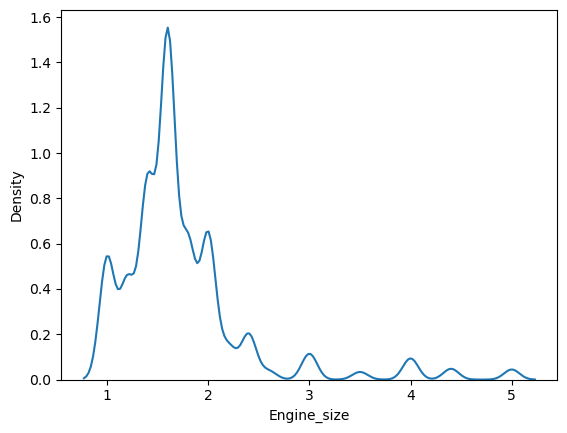

In [67]:
sns.kdeplot(data=df,x="Engine_size")

<Axes: xlabel='Manufacturer', ylabel='count'>

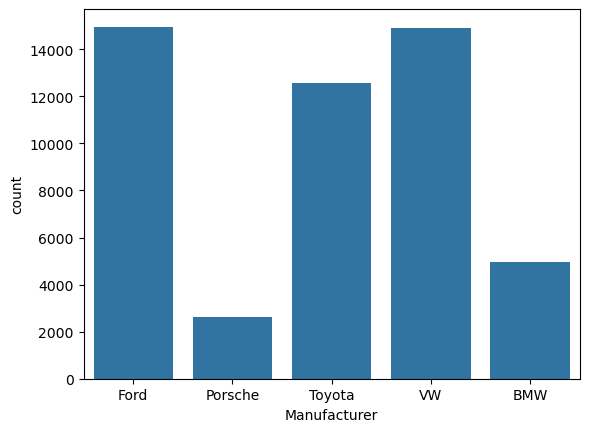

In [68]:
sns.countplot(data=df,x="Manufacturer")

In [71]:
df.head(2)

,Manufacturer,Model,Engine_size,Fuel_type,Manufacturer_Year,Mileage,Price
0,Ford,Fiesta,1.0,PT,1970-01-01 00:00:00.000002002,127300.0,3074.0
1,Porsche,718 Cayman,4.0,PT,1970-01-01 00:00:00.000002016,57850.0,49704.0


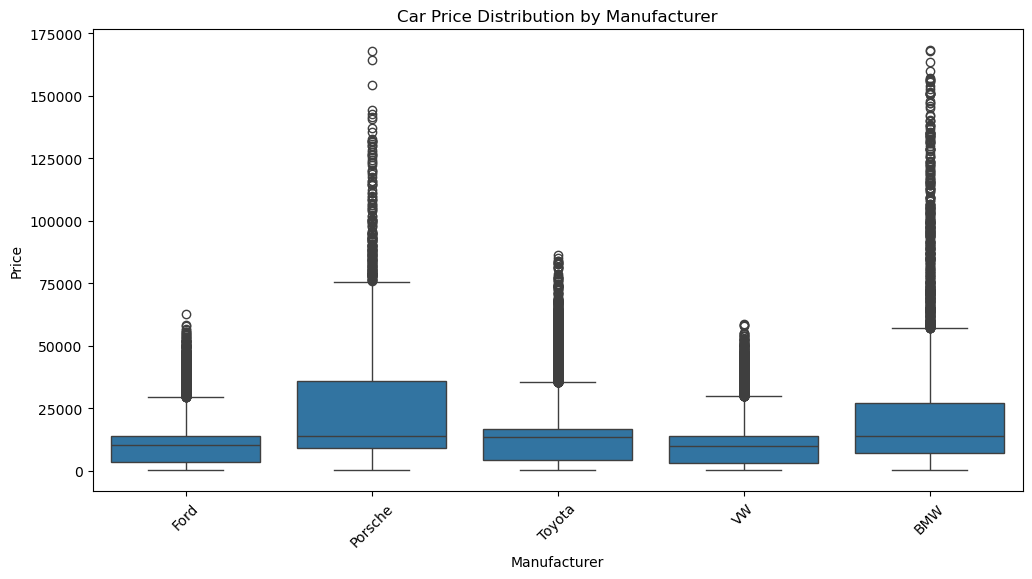

In [65]:
# 1. Boxplot: Price vs Manufacturer
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Manufacturer', y='Price')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Manufacturer')
plt.show()


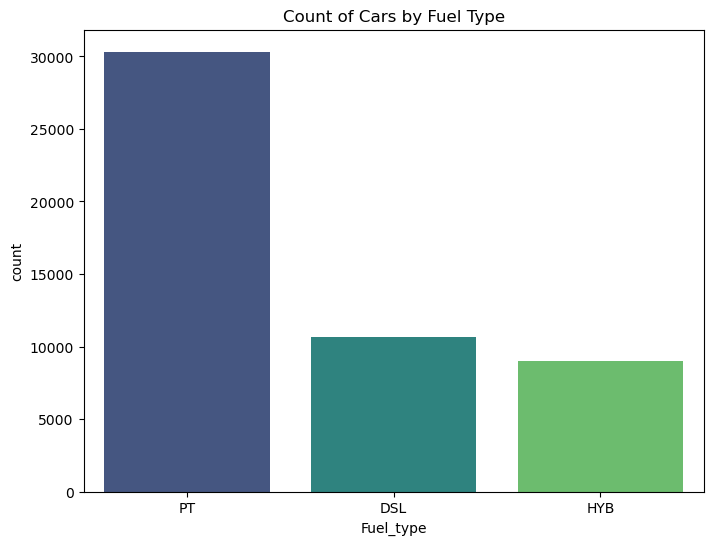

In [74]:

# 2. Bar Plot: Fuel Type Counts
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Fuel_type', palette='viridis')
plt.title('Count of Cars by Fuel Type')
plt.show()

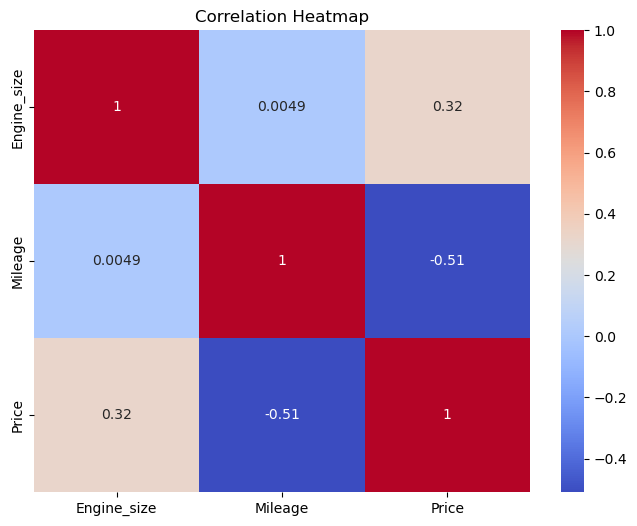

In [75]:
# 3. Heatmap of Correlations
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


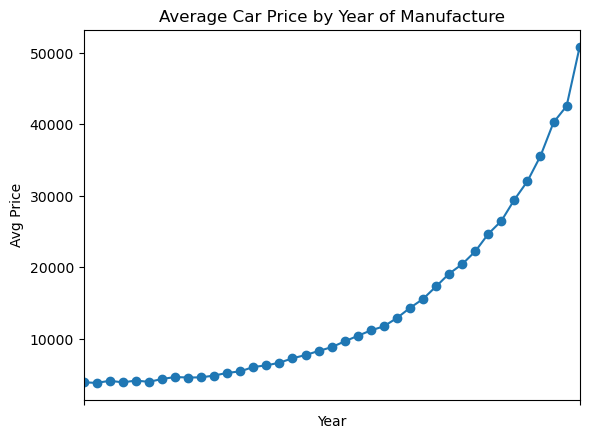

In [78]:

# 4. Line Plot: Average Price Over Years
avg_price_by_year = df.groupby('Manufacturer_Year')['Price'].mean()
avg_price_by_year.plot(kind='line', marker='o')
plt.title('Average Car Price by Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Avg Price')
plt.show()

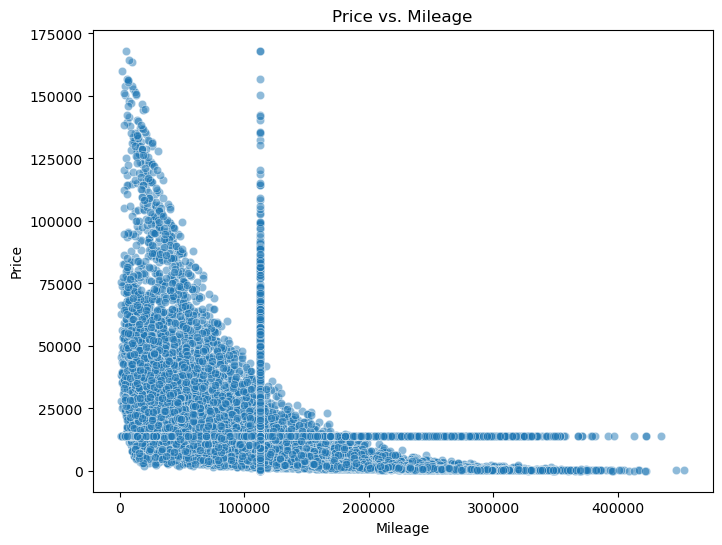

In [79]:
# 5. Scatter Plot: Price vs Mileage
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Mileage', y='Price', alpha=0.5)
plt.title('Price vs. Mileage')
plt.show()

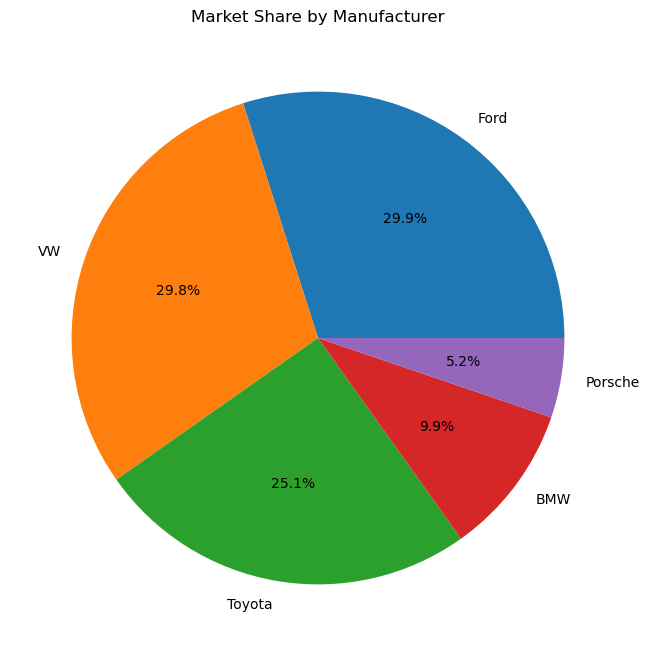

In [80]:
# 6. Pie Chart: Manufacturer Market Share
brand_counts = df['Manufacturer'].value_counts()
brand_counts.plot.pie(autopct='%1.1f%%', figsize=(8,8), title='Market Share by Manufacturer')
plt.ylabel('')
plt.show()


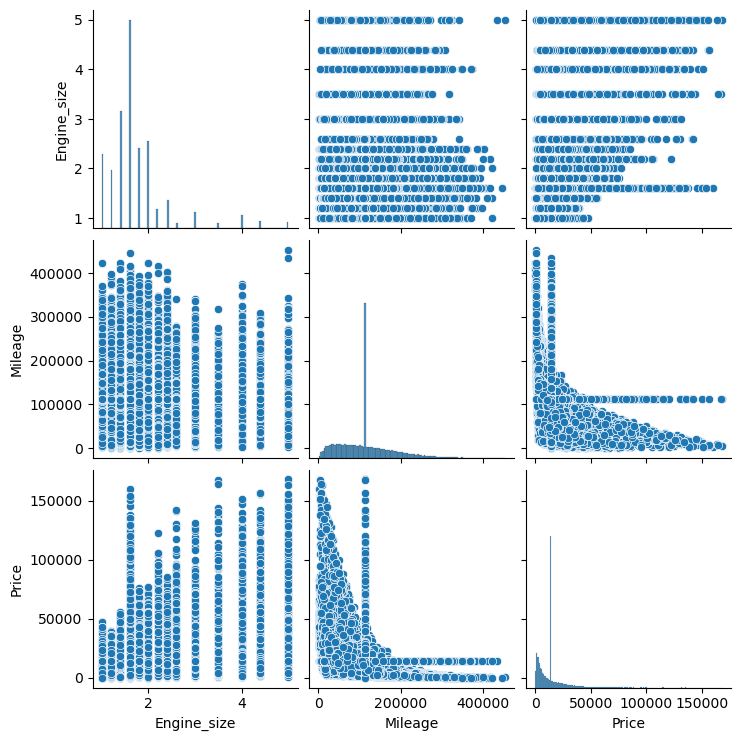

In [81]:
sns.pairplot(data=df)